['images/example_01.jpg', 'images/example_02.jpg', 'images/example_03.jpg', 'images/example_04.jpg', 'images/example_05.jpg', 'images/example_06.jpg']
C:\Users\ammarsyatbi\Documents\Jupyter\Computer Vision\OpenCV-Projects\Object Detection\images
[INFO] loading model...
[INFO] computing object detections...
[INFO] car: 99.95%
[INFO] car: 95.62%


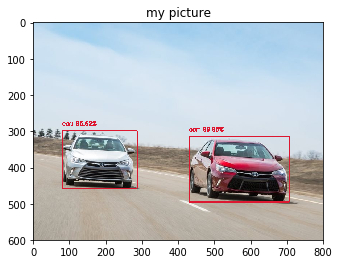

[INFO] computing object detections...
[INFO] aeroplane: 99.67%


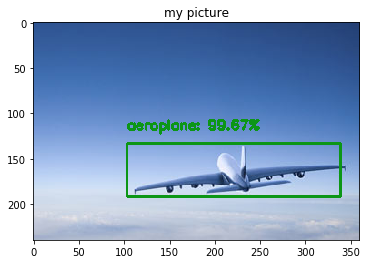

[INFO] computing object detections...
[INFO] horse: 99.84%
[INFO] pottedplant: 99.06%


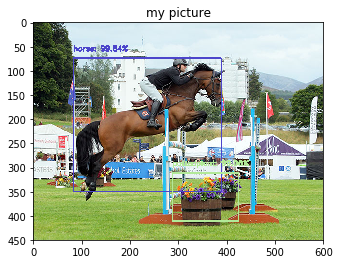

[INFO] computing object detections...
[INFO] bottle: 100.00%


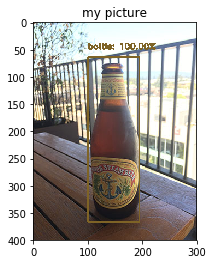

[INFO] computing object detections...
[INFO] car: 99.49%
[INFO] cat: 61.79%
[INFO] dog: 50.56%
[INFO] horse: 99.80%
[INFO] person: 86.79%


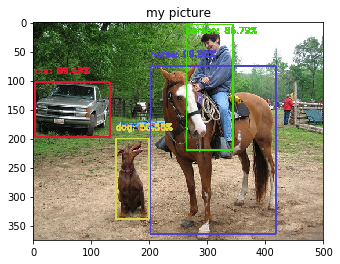

[INFO] computing object detections...
[INFO] dog: 93.76%
[INFO] person: 99.98%


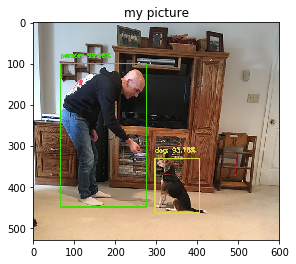

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
import os

data = dict()
data['images'] = []
for img in os.listdir('images'):
    data['images'].append('images/'+img)
    
print(data['images'])

# data['image'] = 'images/example_05.jpg'
print(os.getcwd()+'\\images')
data['prototxt'] = 'MobileNetSSD_deploy.prototxt.txt'
data['model'] = 'MobileNetSSD_deploy.caffemodel'
data['conf'] = 0.5

# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(data["prototxt"], data["model"])

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)

def detect_object(img_dir):
    data['image'] = img_dir
    image = cv2.imread(data['image'])
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > data["conf"]:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

    # show the output image
    # cv2.imshow("Output", image)
    # cv2.waitKey(0)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    %matplotlib inline
    plt.imshow(image)
    plt.title('my picture')
    plt.show()
    
for imgdir in data['images']:
    detect_object(imgdir)